In [100]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [101]:
df = pd.read_csv("output_data/clean_data_for_analysis.csv")

df


,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,1.678856e+08,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,2.572120e+05,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1.849718e+06,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,1.199424e+08,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,2.065700e+04,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Avatar: The Way of Water,Movie,2022-12-16,11520.0,Action,3.0,67.0,7.7,355332,tt1630029,350000000.0,2.315057e+09,others
1149,Puss in Boots: The Last Wish,Movie,2022-12-21,6120.0,Animation,1.0,73.0,7.9,117294,tt3915174,90000000.0,4.800034e+08,others
1150,Wildcat,Movie,2022-12-30,6360.0,Documentary,NaN,71.0,7.8,2605,tt13622204,NaN,NaN,others
1151,Babylon,Movie,2022-12-23,11340.0,Comedy,3.0,60.0,7.2,107214,tt10640346,78000000.0,6.337762e+07,others


In [102]:
budget_df = df[['Title','Platform','Budget','imdbRating','Metascore','imdbVotes','Release']].dropna()
budget_df


,Title,Platform,Budget,imdbRating,Metascore,imdbVotes,Release
0,Insidious: The Last Key,others,10000000.0,5.7,49.0,63102,2018-01-05
3,The Commuter,others,30000000.0,6.3,56.0,118954,2018-01-12
7,12 Strong,others,35000000.0,6.5,54.0,85233,2018-01-19
8,Den of Thieves,others,30000000.0,7.0,49.0,116702,2018-01-19
9,Forever My Girl,others,3500000.0,6.6,36.0,18766,2018-01-19
...,...,...,...,...,...,...,...
1144,The Whale,others,10000000.0,7.7,60.0,127099,2022-12-21
1148,Avatar: The Way of Water,others,350000000.0,7.7,67.0,355332,2022-12-16
1149,Puss in Boots: The Last Wish,others,90000000.0,7.9,73.0,117294,2022-12-21
1151,Babylon,others,78000000.0,7.2,60.0,107214,2022-12-23


# Overall Comparisons 2018-2022

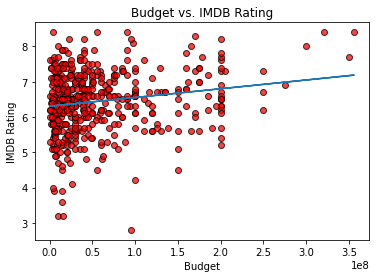

In [103]:
x_axis = budget_df['Budget']

data = budget_df['imdbRating']

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

m, b = np.polyfit(x_axis, data, 1)
plt.plot(x_axis, m*x_axis+b)

plt.title("Overall Budget vs. IMDB Rating")
plt.xlabel("Budget")
plt.ylabel('IMDB Rating')
plt.show()


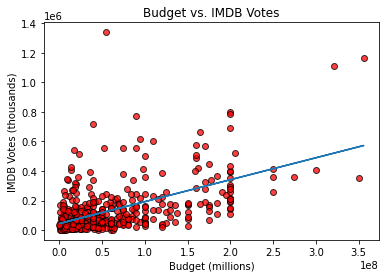

In [104]:
x_axis = budget_df['Budget']

data = budget_df['imdbVotes']

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

m, b = np.polyfit(x_axis, data, 1)
plt.plot(x_axis, m*x_axis+b)

plt.title("Overall Budget vs. IMDB Votes")
plt.xlabel("Budget (millions)")
plt.ylabel("IMDB Votes (millions)")
plt.show()

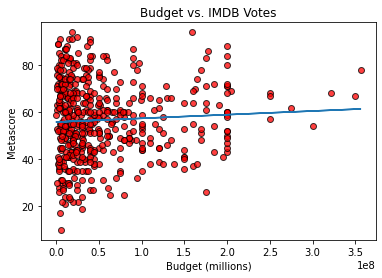

In [105]:
x_axis = budget_df['Budget']

data = budget_df['Metascore']

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

m, b = np.polyfit(x_axis, data, 1)
plt.plot(x_axis, m*x_axis+b)

plt.title("Overall Budget vs. Metascore")
plt.xlabel("Budget (millions)")
plt.ylabel("Metascore")
plt.show()

# Pre Covid Comparisons

In [122]:
# pre covid movies
budget_df['Release'] = pd.to_datetime(budget_df['Release'])
budget_df.sort_values(by='Release')

pre_start = '2018-01-01'
pre_end = '2019-12-31'

pre_df = budget_df[(budget_df['Release'] > pre_start) & (budget_df['Release']< pre_end)]
pre_df


,Title,Platform,Budget,imdbRating,Metascore,imdbVotes,Release
0,Insidious: The Last Key,others,10000000.0,5.7,49.0,63102,2018-01-05
3,The Commuter,others,30000000.0,6.3,56.0,118954,2018-01-12
7,12 Strong,others,35000000.0,6.5,54.0,85233,2018-01-19
8,Den of Thieves,others,30000000.0,7.0,49.0,116702,2018-01-19
9,Forever My Girl,others,3500000.0,6.6,36.0,18766,2018-01-19
...,...,...,...,...,...,...,...
403,Cats,others,95000000.0,2.8,32.0,53048,2019-12-20
404,Spies in Disguise,others,100000000.0,6.8,54.0,52021,2019-12-25
405,Little Women,others,40000000.0,7.8,91.0,216502,2019-12-25
575,The Informer,others,60000000.0,6.6,61.0,39263,2019-08-30


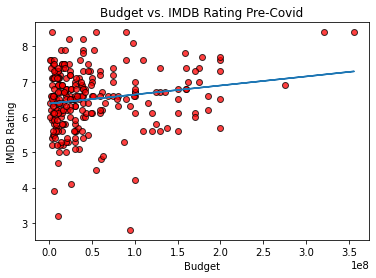

In [125]:
# plotting

x_axis = pre_df['Budget']

data = pre_df['imdbRating']

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

m, b = np.polyfit(x_axis, data, 1)
plt.plot(x_axis, m*x_axis+b)

plt.title("Budget vs. IMDB Rating Pre-Covid")
plt.xlabel("Budget")
plt.ylabel('IMDB Rating')
plt.show()

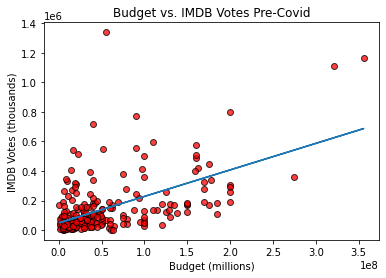

In [133]:
x_axis = pre_df['Budget']

data = pre_df['imdbVotes']

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

m, b = np.polyfit(x_axis, data, 1)
plt.plot(x_axis, m*x_axis+b)

plt.title("Budget vs. IMDB Votes Pre-Covid")
plt.xlabel("Budget (millions)")
plt.ylabel("IMDB Votes (millions)")
plt.show()

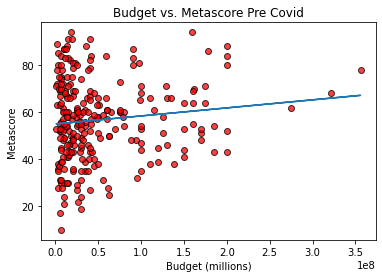

In [128]:
x_axis = pre_df['Budget']

data = pre_df['Metascore']

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

m, b = np.polyfit(x_axis, data, 1)
plt.plot(x_axis, m*x_axis+b)

plt.title("Budget vs. Metascore Pre Covid")
plt.xlabel("Budget (millions)")
plt.ylabel("Metascore")
plt.show()

# Post Covid Comparisons

In [123]:
# post covid movies
post_start = '2020-01-01'
post_end = '2022-12-31'

post_df = budget_df[(budget_df['Release'] > post_start) & (budget_df['Release']< post_end)]
post_df

,Title,Platform,Budget,imdbRating,Metascore,imdbVotes,Release
406,1917,others,95000000.0,8.2,78.0,613994,2020-01-10
407,Just Mercy,others,25000000.0,7.6,68.0,70926,2020-01-10
409,Underwater,others,80000000.0,5.8,48.0,87056,2020-01-10
413,Bad Boys for Life,others,90000000.0,6.5,59.0,165725,2020-01-17
414,Dolittle,others,175000000.0,5.6,26.0,66861,2020-01-17
...,...,...,...,...,...,...,...
1144,The Whale,others,10000000.0,7.7,60.0,127099,2022-12-21
1148,Avatar: The Way of Water,others,350000000.0,7.7,67.0,355332,2022-12-16
1149,Puss in Boots: The Last Wish,others,90000000.0,7.9,73.0,117294,2022-12-21
1151,Babylon,others,78000000.0,7.2,60.0,107214,2022-12-23


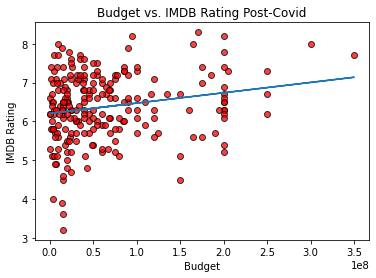

In [130]:
#plotting

x_axis = post_df['Budget']

data = post_df['imdbRating']

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

m, b = np.polyfit(x_axis, data, 1)
plt.plot(x_axis, m*x_axis+b)

plt.title("Budget vs. IMDB Rating Post-Covid")
plt.xlabel("Budget")
plt.ylabel('IMDB Rating')
plt.show()

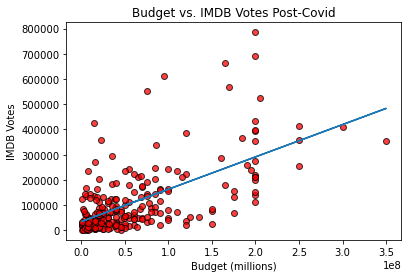

In [132]:
x_axis = post_df['Budget']

data = post_df['imdbVotes']

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

m, b = np.polyfit(x_axis, data, 1)
plt.plot(x_axis, m*x_axis+b)

plt.title("Budget vs. IMDB Votes Post-Covid")
plt.xlabel("Budget (millions)")
plt.ylabel("IMDB Votes")
plt.show()

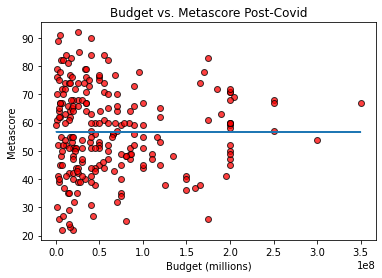

In [139]:
x_axis = post_df['Budget']

data = post_df['Metascore']

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

m, b = np.polyfit(x_axis, data, 1)
plt.plot(x_axis, m*x_axis+b)

plt.title("Budget vs. Metascore Post-Covid")
plt.xlabel("Budget (millions)")
plt.ylabel("Metascore")
plt.show()